##WYLFEER GUZMAN
##VALENTINA ESPITIA 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
import statsmodels.api as sm
import math 


In [201]:
df = pd.read_csv("archivo.csv")

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        46327 non-null  int64  
 1   sexo                               46327 non-null  object 
 2   edad                               46327 non-null  int64  
 3   parentesco_jefe_hogar              46327 non-null  object 
 4   estado_civil                       39867 non-null  object 
 5   viaje_noche_fuera                  39867 non-null  object 
 6   motivo_viaje                       3898 non-null   object 
 7   compañía_viaje                     3898 non-null   object 
 8   destino_depto                      3898 non-null   object 
 9   destino_municipio                  3898 non-null   object 
 10  monto_ultimo_viaje                 3898 non-null   float64
 11  num_viajes_12_meses                3847 non-null   flo

In [203]:
df.describe()

,LLAVE_HOGAR,edad,monto_ultimo_viaje,num_viajes_12_meses,gastos_alojamiento_valor,gastos_transporte_valor,gastos_trans_publico_lugar_valor,gastos_bienes_personales_valor,gastos_regalos_valor,gastos_otros_valor,gastos_transporte_aereo_valor,grado_alcanzado,estrato,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
count,4.632700e+04,46327.000000,3.898000e+03,3847.000000,6.960000e+02,2.476000e+03,889.000000,5.430000e+02,4.610000e+02,7.490000e+02,2.980000e+02,44489.000000,46305.000000,7.290000e+02,4.559800e+04
mean,3.008606e+07,34.255661,4.640856e+05,1.911100,2.533945e+05,9.493138e+04,56287.907762,1.174840e+05,1.213324e+05,1.182423e+05,3.742246e+05,5.721369,2.163524,9.395405e+05,1.664987e+06
std,5.175973e+04,21.699396,9.404449e+05,4.114318,4.870514e+05,1.226154e+05,82138.120397,2.014511e+05,1.736980e+05,1.803378e+05,4.669492e+05,4.149809,1.068873,6.006637e+05,1.666375e+06
min,3.000000e+07,0.000000,0.000000e+00,1.000000,9.800000e+01,9.800000e+01,98.000000,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,0.000000,0.000000,9.800000e+01,9.800000e+01
25%,3.003577e+07,17.000000,5.000000e+04,1.000000,4.000000e+04,2.500000e+04,12000.000000,2.000000e+04,3.000000e+04,2.500000e+04,1.000000e+05,2.000000,1.000000,6.000000e+05,8.200000e+05
50%,3.008981e+07,31.000000,2.000000e+05,1.000000,1.000000e+05,6.000000e+04,30000.000000,5.000000e+04,7.000000e+04,6.000000e+04,2.940000e+05,5.000000,2.000000,8.260000e+05,1.200000e+06
75%,3.013282e+07,51.000000,5.000000e+05,1.000000,2.500000e+05,1.200000e+05,60000.000000,1.000000e+05,1.500000e+05,1.500000e+05,4.650000e+05,10.000000,3.000000,1.000000e+06,2.000000e+06
max,3.020291e+07,105.000000,1.436000e+07,98.000000,5.000000e+06,2.000000e+06,1000000.000000,1.600000e+06,1.600000e+06,1.900000e+06,4.000000e+06,99.000000,9.000000,4.600000e+06,3.000000e+07


In [204]:
df['nivel_educativo'].value_counts(normalize=True)


superior_universitaria    0.288768
media                     0.254467
basica_primaria           0.221178
basica_secundaria         0.165929
ninguno                   0.041426
preescolar                0.027939
no_sabe_no_informa        0.000292
Name: nivel_educativo, dtype: float64

##VARIABLES A ESCOGER:
Estrato

Edad

Viaje noche fuera

Parentezco jefe de hogar

Estado civil
#ANALISIS VARIABLES:
EDAD =Esta variable se relaciona con el parentesco del jefe hogar ya que si es un niño el no tiene desicion sobre viajar, y si es un adulto mayor tampoco

ESTRATO = Esta variable se relaciona directamente como si fueran los ingresos ya que a mayor estrato se entiende que mejores ingresos y mas opiones de viajar

VIAJE NOCHE FUERA = Esta variable se relaciona con si viajo o no 

PARENTESCO HOGAR = Si el jefe de hogar dicidio o no viajar

ESTADO CIVIL = Si la persona es casada, viuda, soltera viaja o no viaja mas.



In [172]:
base = df[["edad","estrato","viaje_noche_fuera","parentesco_jefe_hogar","estado_civil"]]

In [173]:
base

,edad,estrato,viaje_noche_fuera,parentesco_jefe_hogar,estado_civil
0,56,1.0,no,jefe_hogar,soltero
1,25,1.0,no,hijo,soltero
2,1,1.0,NaN,nieto,NaN
3,39,1.0,no,jefe_hogar,separado_divorciado
4,14,1.0,no,hijo,soltero
...,...,...,...,...,...
46322,16,3.0,no,hijo,soltero
46323,76,3.0,no,otro_pariente,viudo
46324,61,2.0,si,jefe_hogar,casado
46325,60,2.0,si,pareja,casado


In [ ]:
base = base[base["parentesco_jefe_hogar"] == "jefe_hogar"]

In [ ]:
from scipy.stats import mode

In [ ]:
mode(base["estado_civil"])

ModeResult(mode=array(['soltero'], dtype=object), count=array([15694]))

In [31]:
mode(base["viaje_noche_fuera"])

ModeResult(mode=array(['no'], dtype=object), count=array([12361]))

In [32]:
mode(base["edad"])

ModeResult(mode=array([40]), count=array([333]))

In [ ]:
base["num_viajes_12_meses"].value_counts(dropna=False)

NaN     10553
1.0      1503
2.0        25
3.0         7
7.0         1
4.0         1
8.0         1
98.0        1
Name: num_viajes_12_meses, dtype: int64

In [35]:
pd.crosstab(base["viaje_noche_fuera"],base["estado_civil"])

estado_civil,casado,pareja_no_union_libre,pareja_union_libre,separado_divorciado,soltero,viudo
viaje_noche_fuera,,,,,,
no,3391,203,3503,2413,1656,1195
si,516,40,378,278,343,113


In [40]:
base[['estado_civil','viaje_noche_fuera']].describe()

,estado_civil,viaje_noche_fuera
count,14029,14029
unique,6,2
top,casado,no
freq,3907,12361


In [41]:
pd.crosstab(base["viaje_noche_fuera"],base["parentesco_jefe_hogar"])

parentesco_jefe_hogar,jefe_hogar
viaje_noche_fuera,
no,12361
si,1668


In [42]:
pd.crosstab(base["viaje_noche_fuera"],base["estrato"])

estrato,0.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0
viaje_noche_fuera,,,,,,,,
no,49,3510,4472,3148,796,206,168,1
si,1,269,474,575,187,85,76,0


In [44]:
pd.crosstab(base["viaje_noche_fuera"],base["edad"])

edad,15,16,17,18,19,20,21,22,23,24,...,90,91,92,93,94,95,96,97,98,102
viaje_noche_fuera,,,,,,,,,,,,,,,,,,,,,
no,1,4,9,30,40,54,67,88,87,135,...,15,14,10,10,6,5,3,1,3,1
si,0,1,4,7,17,16,25,21,25,27,...,2,1,0,0,0,0,0,0,0,0


In [47]:
base.sort_values(by='edad', ascending=True)

,edad,estrato,viaje_noche_fuera,parentesco_jefe_hogar,estado_civil
6847,15,1.0,no,jefe_hogar,pareja_union_libre
2130,16,1.0,no,jefe_hogar,soltero
2742,16,1.0,no,jefe_hogar,pareja_no_union_libre
742,16,1.0,no,jefe_hogar,pareja_no_union_libre
44321,16,4.0,no,jefe_hogar,soltero
...,...,...,...,...,...
33334,97,3.0,no,jefe_hogar,separado_divorciado
37302,98,3.0,no,jefe_hogar,pareja_union_libre
36850,98,1.0,no,jefe_hogar,viudo
39159,98,1.0,no,jefe_hogar,viudo


In [48]:
base.sort_values(by=['edad','estrato']).head(30)

,edad,estrato,viaje_noche_fuera,parentesco_jefe_hogar,estado_civil
6847,15,1.0,no,jefe_hogar,pareja_union_libre
742,16,1.0,no,jefe_hogar,pareja_no_union_libre
2130,16,1.0,no,jefe_hogar,soltero
2742,16,1.0,no,jefe_hogar,pareja_no_union_libre
37909,16,1.0,si,jefe_hogar,soltero
44321,16,4.0,no,jefe_hogar,soltero
21735,17,1.0,no,jefe_hogar,soltero
26680,17,1.0,no,jefe_hogar,soltero
34280,17,1.0,no,jefe_hogar,soltero
2182,17,2.0,si,jefe_hogar,soltero


In [51]:
base['estado_civil'].value_counts(normalize=True)


casado                   0.278495
pareja_union_libre       0.276641
separado_divorciado      0.191817
soltero                  0.142491
viudo                    0.093235
pareja_no_union_libre    0.017321
Name: estado_civil, dtype: float64

In [52]:
base['estrato'].value_counts(normalize=True)

2.0    0.352857
1.0    0.269601
3.0    0.265606
4.0    0.070129
5.0    0.020761
6.0    0.017407
0.0    0.003567
9.0    0.000071
Name: estrato, dtype: float64

In [53]:
viaja = base['viaje_noche_fuera'].value_counts()
viaja

no    12361
si     1668
Name: viaje_noche_fuera, dtype: int64

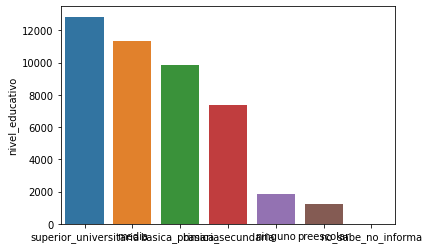

In [206]:
sns.barplot(y=df['nivel_educativo'].value_counts(),x=df['nivel_educativo'].value_counts().index)


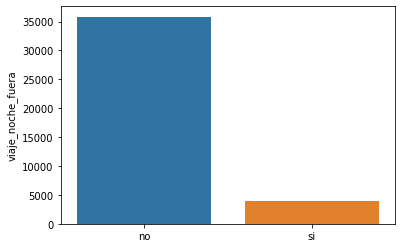

In [ ]:
sns.barplot(y=base['viaje_noche_fuera'].value_counts(),x=base['viaje_noche_fuera'].value_counts().index)


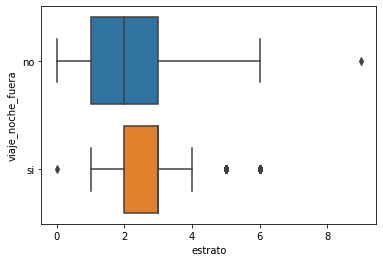

In [ ]:
sns.boxplot(x=base["estrato"], y=base["viaje_noche_fuera"])

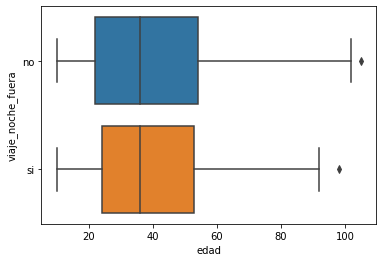

In [209]:
sns.boxplot(x=df["edad"], y=df["viaje_noche_fuera"])

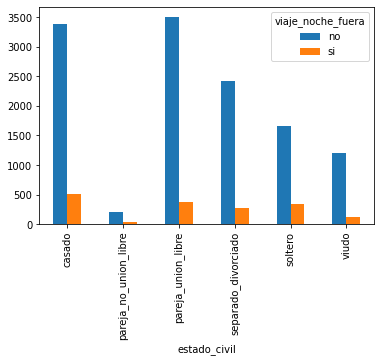

In [ ]:
pd.crosstab(base["estado_civil"],base["viaje_noche_fuera"]).plot(kind="bar")

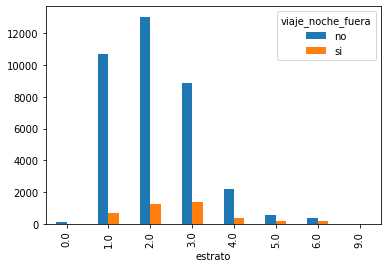

In [197]:
pd.crosstab(base["estrato"],base["viaje_noche_fuera"]).plot(kind="bar")

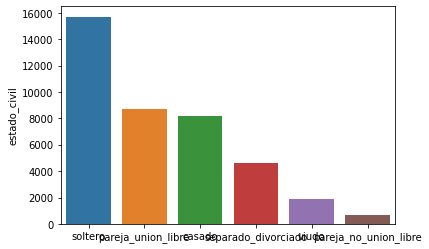

In [207]:
sns.barplot(y=base['estado_civil'].value_counts(),x=base['estado_civil'].value_counts().index)


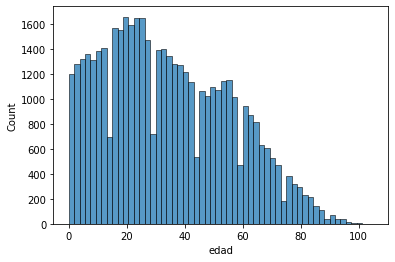

In [210]:
sns.histplot(x=base['edad'])

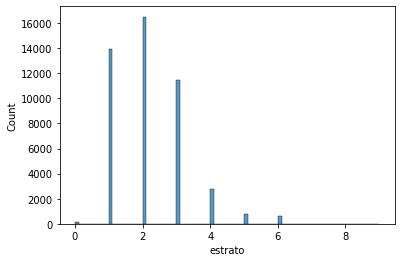

In [212]:
sns.histplot(x=base['estrato'])

###MODELO

In [181]:
y = base['viaje_noche_fuera']
X = base[['edad','estado_civil']]

In [182]:
y=y.replace({"si":1,"no":0})

In [183]:
X =pd.get_dummies(X,drop_first=True)

In [167]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     27.60
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           6.14e-33
Time:                        04:54:07   Log-Likelihood:                -3998.7
No. Observations:               14029   AIC:                             8011.
Df Residuals:                   14022   BIC:                             8064.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2140      0.011     18.622      0.000       0.191       0.237
edad                                  -0.0015      0.000     -7.975      0.000      -0.002      -0.001
estado_civil_pareja_no_union_libre     0.0013      0.022      0.059      0.953      -0.041       0.044
estado_civil_pareja_union_libre       -0.0498      0.008     -6.611      0.000      -0.065      -0.035
estado_civil_separado_divorciado      -0.0312      0.008     -3.863      0.000      -0.047      -0.015
estado_civil_soltero                   0.0211      0.009      2.305      0.021       0.003       0.039
estado_civil_viudo                    -0.0219      0.011     -2.045      0.041      -0.043      -0.001
==============================================================================
Omnibus:                     6001.977   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19576.035
Skew:                           2.315   Prob(JB):                         0.00
Kurtosis:                       6.472   Cond. No.                         431.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A través de los coeficientes se puede evidenciar que entre mayor sea la edad se viaja menos. 

Ademas que su R-squared nos dice que el 1,2% de la varianza esta siendo explicada por este modelo.

Entre las variables que si son significativas vemos que lo es la edad, dandonos a entender lo dicho anteriormente sobre entre mas edad menos se viaja
Tambien observamos que el estado civil de pareja no union libre no es significativo ya que este sobrepasa el 0.5 incluso llegando a 1, lo que significa que si lo quitamos podriamos considerar que no cambiaria el modelo, ya que se rechaza la hipotesis.
Es correcto decir en los coeficientes que las variables negativas aportan de manera negativa al modelo, por ejemplo la edad entre menos edad mas viaja.
Las variables viudo, soltero, divorciado, union libre y edad al ser menores a 0.5 son variables significativas para saber si la muestra viaja y porque razones lo hace o no. 
